In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
x = random.sample(range(0, 999999999), 1100)
y = []
for i in x:
    y.append(2*i + 12)

In [4]:
print(len(x), len(y))

1100 1100


In [5]:
for i in range(len(x)):
    print(x[i], y[i])

775194735 1550389482
34021071 68042154
267679522 535359056
204278300 408556612
689999866 1379999744
575412909 1150825830
353893579 707787170
926209965 1852419942
721085792 1442171596
434048897 868097806
836246134 1672492280
762634932 1525269876
740741701 1481483414
987137571 1974275154
463619677 927239366
564544606 1129089224
166511449 333022910
521565350 1043130712
683869409 1367738830
671958924 1343917860
887836689 1775673390
979321475 1958642962
97988284 195976580
48337214 96674440
870639067 1741278146
174736484 349472980
438428692 876857396
570790950 1141581912
344634084 689268180
156828946 313657904
561745557 1123491126
562128562 1124257136
110245440 220490892
480573690 961147392
559811745 1119623502
736255089 1472510190
593489623 1186979258
382233091 764466194
267556357 535112726
986321515 1972643042
947191443 1894382898
612934199 1225868410
185210731 370421474
119718684 239437380
437573167 875146346
423162167 846324346
565319874 1130639760
156629138 313258288
439992485 879984982

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x

array([775194735,  34021071, 267679522, ..., 325572612, 963202558,
       223715616])

In [8]:
u = x.mean()
std = x.std()

In [9]:
std

290786292.85533947

In [10]:
x = (x - u)/std

In [11]:
u_y = y.mean()
std_y = y.std()
y = (y-u_y)/std_y

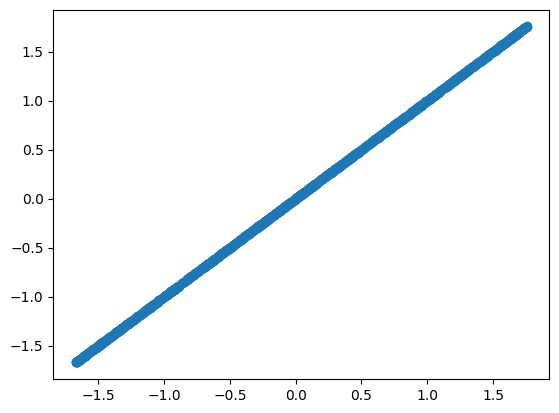

In [12]:
plt.scatter(x, y)

In [13]:
print(x.shape, y.shape, x[0], y[0])

(1100,) (1100,) 0.9925545354366037 0.9925545354366037


In [14]:
def hypothesis(X, theta):
    y_ = theta[0] + theta[1]*X
    return y_

In [15]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss+=(y_p - y_gt)**2
        
    return total_loss/m

In [16]:
def gradient(X, Y, theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        grad[0] += (y_p - y_gt)*1
        grad[1] += (y_p - y_gt)*X[i]
        
    return grad/m

In [17]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
    
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, cost_epoch

In [18]:
X_train = x[:1000]
Y_train = y[:1000]
X_test = x[1000:]
Y_test = y[1000:]

In [19]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000,) (100,) (1000,) (100,)


In [60]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.3, epochs=100)

In [61]:
theta

array([-4.01435852e-17,  1.00000000e+00])

In [62]:
cost_epoch

[1.006026130676423,
 0.49040841131689245,
 0.23906058195175203,
 0.116535824837979,
 0.05680837467001201,
 0.027692789743731485,
 0.013499649568040742,
 0.00658081574568561,
 0.003208030028198041,
 0.0015638625616363807,
 0.0007623601963049179,
 0.00037164074606798854,
 0.00018117068258627003,
 8.831897351966716e-05,
 4.305480312389083e-05,
 2.098894998783295e-05,
 1.0232018947031674e-05,
 4.98808085088732e-06,
 2.43168416249162e-06,
 1.1854476754762061e-06,
 5.779086055448131e-07,
 2.817328512139534e-07,
 1.3734643273941198e-07,
 6.695744146106842e-08,
 3.264238606981093e-08,
 1.5913530181000222e-08,
 7.75805338403345e-09,
 3.7821661176544145e-09,
 1.8438689378628188e-09,
 8.989201533033328e-10,
 4.3824181625727467e-10,
 2.1365258373976652e-10,
 1.0416075722385359e-10,
 5.078105985138374e-11,
 2.4757173166605834e-11,
 1.20698540196746e-11,
 5.884433488295372e-12,
 2.8688575562511313e-12,
 1.3986691844702463e-12,
 6.819032032756294e-13,
 3.324544615888421e-13,
 1.620851847050328e-13,
 

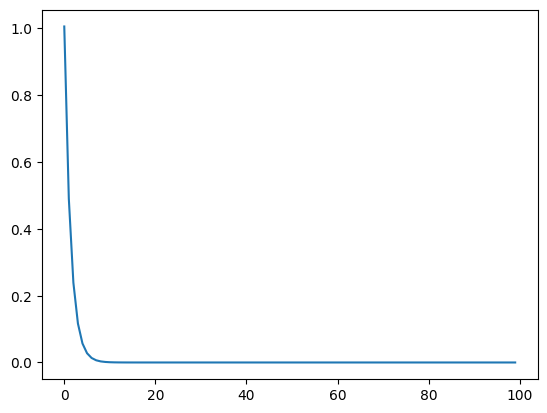

In [63]:
plt.plot(cost_epoch)

In [64]:
y_p = theta[0] + theta[1]*X_test

In [65]:
for i in range(len(y_p)):
    print(y_p[i], Y_test[i])

0.7671193632477562 0.7671193632477564
-0.9518533162817682 -0.9518533162817684
-1.353418276078861 -1.3534182760788611
0.3889940949611255 0.3889940949611257
0.045037641519364145 0.045037641519364194
-0.42921195135468915 -0.4292119513546892
0.3368408766952821 0.33684087669528223
0.16127802433828675 0.1612780243382868
-1.4569050453639951 -1.4569050453639953
-0.3018397061353255 -0.3018397061353255
1.5604977468525518 1.5604977468525523
0.11650282234320093 0.116502822343201
1.009200639874573 1.0092006398745732
-0.17199936658815582 -0.17199936658815582
-1.4664344594666692 -1.4664344594666694
0.19982270913048183 0.19982270913048192
1.7079079654673763 1.7079079654673768
1.6747577749774982 1.6747577749774987
-1.6159428478198572 -1.6159428478198576
0.9877468363312831 0.9877468363312834
0.14340555535438784 0.1434055553543879
1.2144229129536124 1.2144229129536126
-0.30978612265073374 -0.30978612265073374
-0.9470763442093911 -0.9470763442093914
1.029410247907657 1.0294102479076572
1.3716124439702588 

In [66]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1 - num/den)
    
    return score

In [67]:
R2_score(Y_test, y_p)

1.0

In [78]:
T0 = np.arange(-50, 50)
T1 = np.arange(-50, 50)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = T0[i, j] + T1[i, j]*X_test
        J[i, j] = (np.sum((y_pred - Y_test)**2))/Y_test.shape[0]

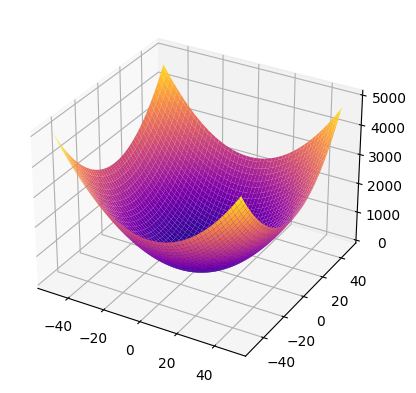

In [81]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, J, cmap = 'plasma')